<a href="https://colab.research.google.com/github/giveluck/icpc/blob/master/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   23G   56G  30% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        50G   25G   26G  49% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:        10611664 kB
MemAvailable:   12404384 kB
Buffers:           61752 kB
Cached:          1885868 kB
SwapCached:            0 kB
Active:           618700 kB
Inactive:        1836052 kB
Active(anon):        992 kB
Inactive(anon):   460552 kB
Active(file):     617708 kB
Inactive(file):  1375500 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1128 kB
Writeback:             0 kB
AnonPages:        507172 kB
Mapped:           234832 kB
Shmem:              1296 kB
KReclaimable:      81924 kB
Slab:             116744 kB
SReclaimable:      81924 kB
SUnreclaim:        34820 kB
KernelStack:        4864 kB
PageTables:         9116 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    2874336 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       49440 kB
VmallocChunk:          0 kB
Percpu:          

In [4]:
!nvidia-smi

Mon Oct 31 04:27:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
import numpy as numpy 
import tensorflow as tf
import matplotlib.pyplot as plt
# 데이터다운로드
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words= 1000)

17464789/17464789 [==============================] - 0s 0us/step


In [11]:
def one_hot_sequences(sequences, dimension = 1000):
  results = numpy.zeros((len(sequences), dimension))
  for i, word_index in enumerate(sequences):
       results[i, word_index] = 1
  return results

In [12]:
train_data = one_hot_sequences(train_data)
test_data= one_hot_sequences(test_data)
# 신경망모델구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape= (1000,)))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])
# 신경망훈련, 검증데이터전달
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size= 512,
                    validation_data= (test_data, test_labels),
                    verbose = 2)

Epoch 1/20
49/49 - 3s - loss: 0.5632 - accuracy: 0.7170 - val_loss: 0.4194 - val_accuracy: 0.8242 - 3s/epoch - 62ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3595 - accuracy: 0.8527 - val_loss: 0.3496 - val_accuracy: 0.8526 - 316ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3189 - accuracy: 0.8693 - val_loss: 0.3362 - val_accuracy: 0.8569 - 321ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3081 - accuracy: 0.8732 - val_loss: 0.3291 - val_accuracy: 0.8595 - 282ms/epoch - 6ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3044 - accuracy: 0.8745 - val_loss: 0.3374 - val_accuracy: 0.8574 - 305ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2993 - accuracy: 0.8781 - val_loss: 0.3313 - val_accuracy: 0.8601 - 305ms/epoch - 6ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2951 - accuracy: 0.8791 - val_loss: 0.3315 - val_accuracy: 0.8586 - 286ms/epoch - 6ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2920 - accuracy: 0.8799 - val_loss: 0.3325 - val_accuracy: 0.8589 - 287ms/epoch - 6ms/step
Epoch 9/20
49/49 -

In [16]:
history_dict = history.history
loss_values= history_dict['loss']# 훈련데이터의손실값
Val_loss_values= history_dict['val_loss']# 검증데이터의손실값
Acc= history_dict['accuracy']# 정확도
Epochs = range(1, len(Acc) + 1)# Epoch의수

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Upper Left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


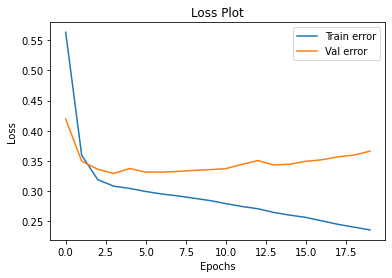

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train error', 'Val error'], loc= 'Upper Left') 
plt.show()

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, kernel_regularizer= tf.keras.regularizers.l2(0.001),
                      activation = 'relu', input_shape= (1000,)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer= tf.keras.regularizers.l2(0.001),
                      activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [19]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size= 512,
                    validation_data= (test_data, test_labels),
                    verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6134 - accuracy: 0.7142 - val_loss: 0.4719 - val_accuracy: 0.8218 - 992ms/epoch - 20ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4124 - accuracy: 0.8465 - val_loss: 0.3885 - val_accuracy: 0.8544 - 316ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3641 - accuracy: 0.8649 - val_loss: 0.3702 - val_accuracy: 0.8598 - 315ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3491 - accuracy: 0.8710 - val_loss: 0.3655 - val_accuracy: 0.8602 - 329ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3417 - accuracy: 0.8729 - val_loss: 0.3643 - val_accuracy: 0.8601 - 285ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3382 - accuracy: 0.8748 - val_loss: 0.3635 - val_accuracy: 0.8591 - 336ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3326 - accuracy: 0.8765 - val_loss: 0.3585 - val_accuracy: 0.8602 - 327ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3303 - accuracy: 0.8765 - val_loss: 0.3570 - val_accuracy: 0.8594 - 294ms/epoch - 6ms/step
Epoch 9/20
49/4

In [20]:
history_dict = history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
acc= history_dict['accuracy']
epochs = range(1, len(acc) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Upper Left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


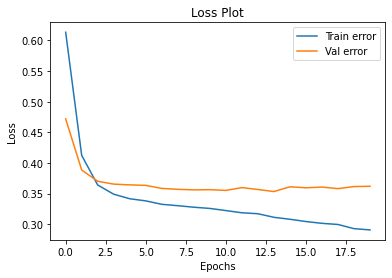

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(['Train error', 'Val error'], loc= 'Upper Left') 
plt.show()

In [22]:
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape= (1000,))) 
model.add(tf.keras.layers.Dropout(0.5)) 
model.add(tf.keras.layers.Dense(16, activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.5)) 
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(train_data,
                    train_labels,
                    epochs = 20,
                    batch_size= 512,
                    validation_data= (test_data, test_labels),
                    verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6818 - accuracy: 0.5494 - val_loss: 0.6277 - val_accuracy: 0.7266 - 984ms/epoch - 20ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5980 - accuracy: 0.6699 - val_loss: 0.4833 - val_accuracy: 0.8164 - 317ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5045 - accuracy: 0.7600 - val_loss: 0.3917 - val_accuracy: 0.8443 - 486ms/epoch - 10ms/step
Epoch 4/20
49/49 - 1s - loss: 0.4429 - accuracy: 0.8028 - val_loss: 0.3500 - val_accuracy: 0.8544 - 613ms/epoch - 13ms/step
Epoch 5/20
49/49 - 1s - loss: 0.4048 - accuracy: 0.8280 - val_loss: 0.3374 - val_accuracy: 0.8587 - 586ms/epoch - 12ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3800 - accuracy: 0.8404 - val_loss: 0.3244 - val_accuracy: 0.8605 - 674ms/epoch - 14ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3684 - accuracy: 0.8478 - val_loss: 0.3221 - val_accuracy: 0.8611 - 328ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3562 - accuracy: 0.8548 - val_loss: 0.3240 - val_accuracy: 0.8600 - 313ms/epoch - 6ms/step
Epoch 9/20


In [24]:
history_dict = history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
acc= history_dict['accuracy']
epochs = range(1, len(acc) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Upper Left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


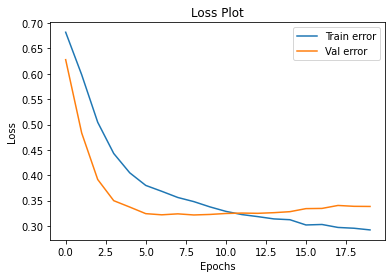

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot') 
plt.ylabel('Loss') 
plt.xlabel('Epochs') 
plt.legend(['Train error', 'Val error'], loc= 'Upper Left') 
plt.show()

In [26]:
import numpy as np 
x = np.array( [[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]],
               [[10, 11, 12, 13, 14], [15, 16, 17, 18, 19]],
               [[20, 21, 22, 23, 24], [25, 26, 27, 28, 29]],]
             )
x.ndim
x.shape

(3, 2, 5)